In [1]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns 

# data import


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

#  train test split

In [3]:
X_train ,X_test ,y_train , y_test = train_test_split(X, y ,test_size=0.2, random_state=42 , stratify=y)

In [4]:
#convert to float32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Preprocessing

In [5]:
class irisdataset(Dataset):
  def __init__(self , X_train , y_train):
        super().__init__()
        self.X = torch.from_numpy(X_train)
        self.y = torch.from_numpy(y_train)
        self.y = self.y.type(torch.LongTensor)
        self.len = self.X.shape[0]
    
  def __getitem__(self , index):   
      return self.X[index] , self.y[index]
  
  def __len__(self):
      return self.len
    
    

In [6]:
iris_data = irisdataset(X_train=X_train, y_train=y_train)


In [7]:
train_loder = DataLoader(dataset=iris_data, batch_size=32 , shuffle=True)

In [8]:
print(f"X Shape: {iris_data.X.shape}, y shape: {iris_data.y.shape}")


X Shape: torch.Size([120, 4]), y shape: torch.Size([120])


# Modelcreate 

In [9]:
class MultiClassnn(nn.Module):
    def __init__(self , num_features,num_classes,hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(num_features , hidden_size)
        self.fc2  = nn.Linear(hidden_size , num_classes) 
        self.logsoftmax = nn.LogSoftmax(dim=1)
    
    def forward(self , X):
        X = self.fc1(X)
        X = torch.relu(X) 
        X = self.fc2(X)
        X = self.logsoftmax(X)
        return X
    
        
            

In [10]:
num_features = iris_data.X.shape[1]
hidden_size = 5 
num_classes = len(iris_data.y.unique()) 
lr = 0.01
num_epochs = 100

In [11]:
num_classes


3

In [12]:
num_features

4

In [59]:
#hyper parameters
model = MultiClassnn(num_features=num_features , num_classes=num_classes , hidden_size=hidden_size)

In [60]:
#loss function 
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = torch.optim.Adam(model.parameters() , lr=lr)

In [64]:
losses = []
for epoch in range (num_epochs):
    for x,y in train_loder:
        
      optimizer.zero_grad()
      #forward pass 
      y_pred = model(X=x)
      
      #calculate loss
      loss =criterion(y_pred , y )
      
      #backword pass
      loss.backward()
      
      
      #updtae weights
      optimizer.step()
      
    losses.append(float(loss.data.detach().numpy()))
      
            

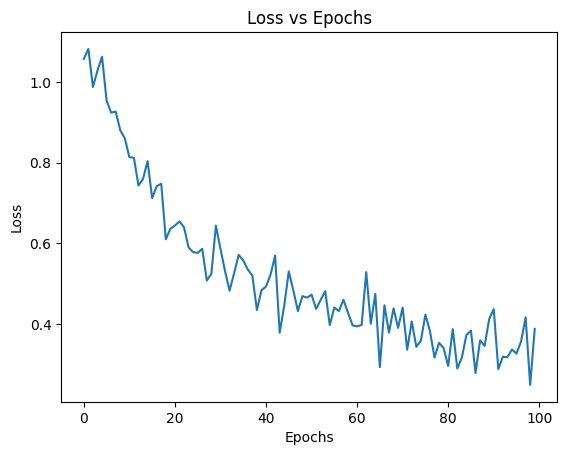

In [65]:
sns.lineplot(x= range(len(losses)), y = losses)
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


# test the model

In [67]:
#test the model
test_tensor = torch.from_numpy(X_test)


In [76]:
with torch.no_grad():
    y_pred_test = model(test_tensor)
    y_pred_test = torch.max(y_pred_test.data , dim =1)
    

In [78]:
accuracy = accuracy_score(y_test ,y_pred_test.indices)
accuracy

0.9666666666666667

# save the model

In [79]:
torch.save(model.state_dict(), 'model_iris.pt')
